<a href="https://colab.research.google.com/github/HosseinZaredar/Studies/blob/main/Stanford%20ML/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install drawdata

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import math
from google.colab import files
import io

# Draw Dataset

In [ ]:
from drawdata import draw_scatter
draw_scatter()

# Load dataset

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded[next(iter(uploaded))].decode('utf-8')))

Saving data (6).csv to data (6).csv


# Preprocessing The Dataset
The main reason for mean-centering is that plotting the principal components on top of the data gets easier. Furthermore, the matrix X.T @ X would equal to Covariance Matrix if the input is mean-centered. Although, doing so is not needed to find PCs.

In [ ]:
X = np.array(df.iloc[:, 0:2])
mean = np.sum(X, axis=0) / len(X)
X -= mean
X = X / 250

Shape: (273, 2)


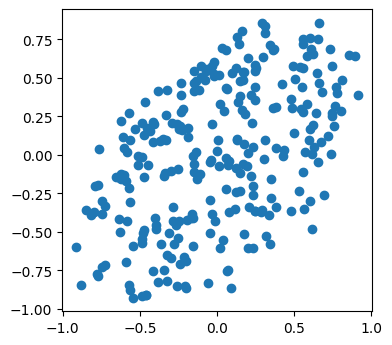

In [ ]:
print('Shape:', X.shape)
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100
plt.scatter(X[:, 0], X[:, 1])

# Principal Component Analysis

## Method 1: Calculate EigenDecomposition of of X.T @ X

* EigenDecomposition of a matrix A, returns its unit Eigen vectors which are the PCs that we're looking for.
* SVD of a symmetric matrix is equal to its EigenDecomposition (Hence, I used SVD in the code down below).

## Method 2: SVD of X.T

* The U matrix returned by SVD of a matrix A is basically the unit Eigen vectors of A.T @ A. This is the reason why this method is identical to the first one in calculating PCs.

In [ ]:
method = 1

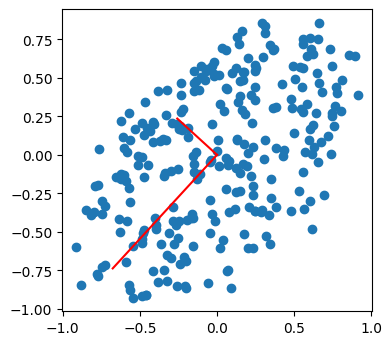

In [ ]:
if method == 1:
  u, s, v = np.linalg.svd(X.T @ X)
else:
  u, s, v = np.linalg.svd(X.T)

# if we've used the second method, we need to add a 2 power, since the numbers
# in the s matrix are singular values (= sqrt(eigen values))

plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, u[0, 0]], [0, u[1, 0]], 'r')
plt.plot([0, (s[1] ** method / s[0] ** method) * u[0, 1]], [0, (s[1] ** method / s[0] ** method) * u[1, 1]], 'r')

# Drawing Ellipse

In PCA, the Covariance matrix can be considered as a data-driven linear transformation that turns a unit circle into an ellipse which fits the data best, in terms of the variance in different directions.

In [ ]:
def rotate(v, degree):
  rotation_matrix = np.array([
      [math.cos(degree), -1 * math.sin(degree)],
      [math.sin(degree), math.cos(degree)]
  ])
  return rotation_matrix @ v

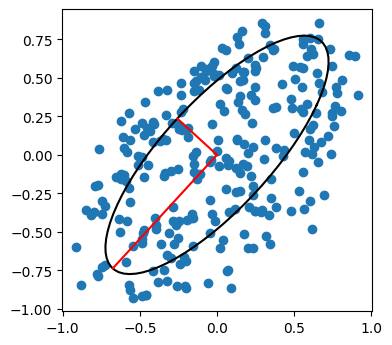

In [ ]:
A = X.T @ X

i = np.array([[1], [0]])
n = 72
degree = 2 * math.pi / n

current = i
transformed_current = A @ i

currents = np.zeros((n + 1, 2))
currents[0, :] = current.T
transformed_currents[0, :] = transformed_current.T

for j in range(n):
    current = rotate(current, degree)
    transformed_current = A @ current
    transformed_currents[j + 1, :] = transformed_current.T

plt.scatter(X[:, 0], X[:, 1])
plt.plot(transformed_currents[:, 0] / s[0] ** method, transformed_currents[:, 1] / s[0] ** method, 'black')
plt.plot([0, u[0, 0]], [0, u[1, 0]], 'r')
plt.plot([0, (s[1] ** method / s[0] ** method) * u[0, 1]], [0, (s[1] ** method / s[0] ** method) * u[1, 1]], 'r')

# Projection and Reconstruction

The projection of datapoints into the first k PCs can be calculated in 2 different ways:

1. Using U[:k, :].T as projectection matrix (works for both methods).
2. Using S[:k, :k] @ V[:k, :] (only works for the second method since the first method doesn't work with the actual datapoints).

Reconstruction is simple as U @ Projected.

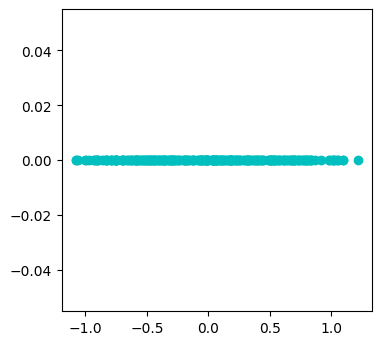

In [ ]:
projected = X @ u[0, :]
# projected = s[0] * v[0, :]

plt.plot(projected, np.zeros((1, len(X)))[0], 'co')

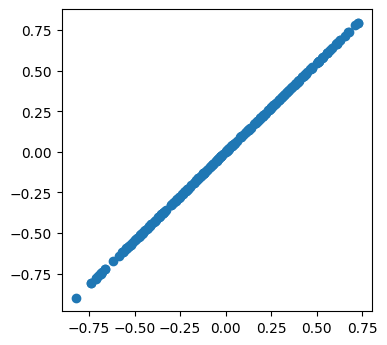

In [ ]:
reconstructed = u[0:1, :].T @ np.array([projected])
plt.scatter(reconstructed[0], reconstructed[1])

# An Improtant Point
SVD compression is exacatly the same as PCA using the 2nd method.